# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [1]:
import chardet

with open('PoliceShootingsUS.csv', 'rb') as f:
     content = f.read()
     result = chardet.detect(content)
     print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [2]:
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import csv

In [3]:
from urllib import request

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())

In [4]:
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/lab_data.zip?raw=true'
file_name = 'Lab_Data.zip'
download_file(file_name, file_url)

In [5]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 

In [6]:
unzip(file_name)

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


In [7]:
df = pd.read_csv("PoliceShootingsUS.csv", encoding = 'Windows-1252')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [8]:
## Your code is here
offenders_older_than_55 = df["age"] > 55
offenders_older_than_55.sum()

235

* What's the age distribution?

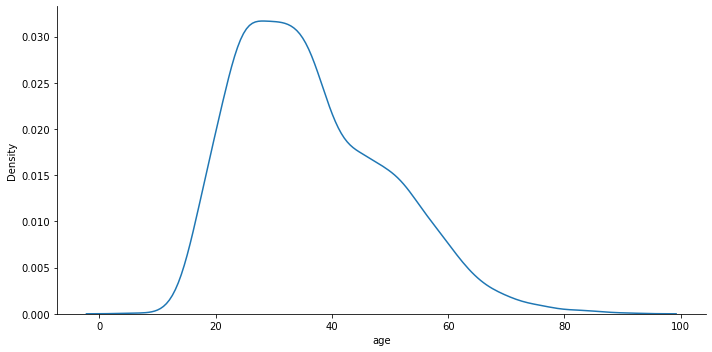

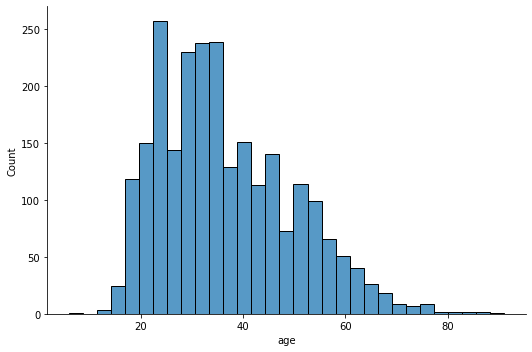

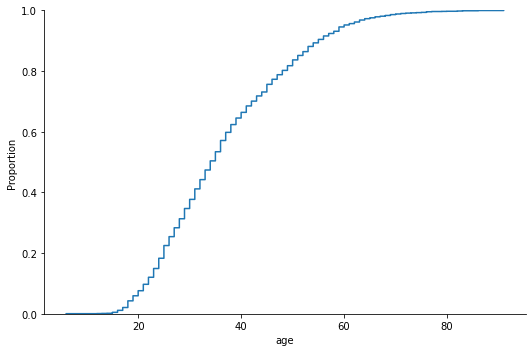

In [9]:
## Your code is here
plot = sns.displot(df, x = "age", kind="kde", aspect = 2)
plot = sns.displot(df, x = "age", aspect = 1.5)
plot = sns.displot(df, x = "age", kind="ecdf", aspect = 1.5)

From the above plots, it can be said that is more concentrated in the range of 20 and 40. 

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [10]:
## Your code is here
with open('volunteers.txt', 'r') as file:
    lines = file.readlines()
#     print(reader)
    for line in lines:
        print(line)

"log"[Harding, Christine] (Virginia) - Universal human-resource flexibility

"log"[Davis, Kimberly] (New York) - Compatible demand-driven hub

"log"[Ingram, Rachel] (Louisiana) - Versatile multimedia website

"log"[Walker, Richard] (Oregon) - Networked eco-centric approach

"log"[Barnes, Francisco] (Virginia) - Persistent systematic moratorium

"log"[Perez, Rachel] (Alaska) - Optimized national portal

"log"[Choi, Linda] (Iowa) - Operative discrete Internet solution

"log"[Gomez, Janice] (Vermont) - Managed national attitude

"log"[Lloyd, Jesus] (Connecticut) - Adaptive systematic definition

"log"[Moore, Alicia] (Michigan) - Innovative motivating support

"log"[Murray, Pamela] (Arizona) - Diverse systematic policy

"log"[Moore, Brittney] (Washington) - Progressive web-enabled synergy

"log"[Jones, Alexander] (Arizona) - Advanced 24/7 data-warehouse

"log"[Morales, David] (Florida) - Streamlined eco-centric conglomeration

"log"[Hogan, Elizabeth] (Rhode Island) - Re-engineered demand-d

In [11]:
fname = ['Name']
lname = ['Lastname']
sname = ['State']
with open('volunteers.txt', 'r') as file:
    while(True):
        line = file.readline()
        
        if not line:
            break
        
        line = line.replace('"',',')
        line = line.replace('-',',')
        line = line.replace('[',',')
        line = line.replace(']',',')
        line = line.replace(')',',')
        line = line.replace('(',',')
#        print(line)
        fname.append(line.split(',')[4])
        lname.append(line.split(',')[3])
        sname.append(line.split(',')[6])
#         vdf1.first_name = line.split(',')[4]
#         vdf1.last_name = line.split(',')[3]
#         vdf1.state = line.split(',')[6]
        

In [12]:
print(fname)
print(lname)
print(sname)

['Name', ' Christine', ' Kimberly', ' Rachel', ' Richard', ' Francisco', ' Rachel', ' Linda', ' Janice', ' Jesus', ' Alicia', ' Pamela', ' Brittney', ' Alexander', ' David', ' Elizabeth', ' Courtney', ' Mark', ' Philip', ' Michael', ' Barbara', ' Shawn', ' Ernest', ' Alexander', ' Kendra', ' Samantha', ' Kara', ' Vickie', ' Matthew', ' Nicole', ' Eric', ' Karen', ' Donald', ' Sarah', ' Veronica', ' Steven', ' Alexandra', ' Nicole', ' Riley', ' Kenneth', ' Jeffery', ' Nichole', ' Mary', ' Andrew', ' Richard', ' Emily', ' Abigail', ' Michael', ' Jennifer', ' Roberto', ' Kimberly', ' Susan', ' Rita', ' Matthew', ' Trevor', ' Melissa', ' Paul', ' Robert', ' Connor', ' Charles', ' Ashley', ' Paul', ' Ashley', ' Jeffery', ' Kevin', ' Michelle', ' Shelly', ' Robin', ' Helen', ' Vanessa', ' Emily', ' Joseph', ' Monica', ' Jorge', ' Jennifer', ' Amber', ' Tyler', ' Ruben', ' Larry', ' James', ' Travis', ' Teresa', ' Scott', ' Patricia', ' Amber', ' Jessica', ' Andrea', ' Sydney', ' Stephanie', 

In [13]:
final_list = []
for i in range(0,len(fname)):
    final_list.append("{0},{1},{2}".format(fname[i],lname[i],sname[i]))

In [14]:
final_list

['Name,Lastname,State',
 ' Christine,Harding,Virginia',
 ' Kimberly,Davis,New York',
 ' Rachel,Ingram,Louisiana',
 ' Richard,Walker,Oregon',
 ' Francisco,Barnes,Virginia',
 ' Rachel,Perez,Alaska',
 ' Linda,Choi,Iowa',
 ' Janice,Gomez,Vermont',
 ' Jesus,Lloyd,Connecticut',
 ' Alicia,Moore,Michigan',
 ' Pamela,Murray,Arizona',
 ' Brittney,Moore,Washington',
 ' Alexander,Jones,Arizona',
 ' David,Morales,Florida',
 ' Elizabeth,Hogan,Rhode Island',
 ' Courtney,Floyd,Pennsylvania',
 ' Mark,Scott,West Virginia',
 ' Philip,Johnson,North Carolina',
 ' Michael,Taylor,New Hampshire',
 ' Barbara,Freeman,Pennsylvania',
 ' Shawn,Humphrey,Oklahoma',
 ' Ernest,Schultz,South Carolina',
 ' Alexander,Harper,Mississippi',
 ' Kendra,Shaw,Nebraska',
 ' Samantha,Glenn,Louisiana',
 ' Kara,Jackson,Wyoming',
 ' Vickie,Rivera,North Carolina',
 ' Matthew,Robinson,Iowa',
 ' Nicole,Taylor,Kansas',
 ' Eric,Harper,South Dakota',
 ' Karen,Smith,Oklahoma',
 ' Donald,Chavez,Nebraska',
 ' Sarah,Thompson,Ohio',
 ' Veronic

In [15]:
fl = []
for i in range(0, len(final_list)):
    fl.append([final_list[i]])
fl

[['Name,Lastname,State'],
 [' Christine,Harding,Virginia'],
 [' Kimberly,Davis,New York'],
 [' Rachel,Ingram,Louisiana'],
 [' Richard,Walker,Oregon'],
 [' Francisco,Barnes,Virginia'],
 [' Rachel,Perez,Alaska'],
 [' Linda,Choi,Iowa'],
 [' Janice,Gomez,Vermont'],
 [' Jesus,Lloyd,Connecticut'],
 [' Alicia,Moore,Michigan'],
 [' Pamela,Murray,Arizona'],
 [' Brittney,Moore,Washington'],
 [' Alexander,Jones,Arizona'],
 [' David,Morales,Florida'],
 [' Elizabeth,Hogan,Rhode Island'],
 [' Courtney,Floyd,Pennsylvania'],
 [' Mark,Scott,West Virginia'],
 [' Philip,Johnson,North Carolina'],
 [' Michael,Taylor,New Hampshire'],
 [' Barbara,Freeman,Pennsylvania'],
 [' Shawn,Humphrey,Oklahoma'],
 [' Ernest,Schultz,South Carolina'],
 [' Alexander,Harper,Mississippi'],
 [' Kendra,Shaw,Nebraska'],
 [' Samantha,Glenn,Louisiana'],
 [' Kara,Jackson,Wyoming'],
 [' Vickie,Rivera,North Carolina'],
 [' Matthew,Robinson,Iowa'],
 [' Nicole,Taylor,Kansas'],
 [' Eric,Harper,South Dakota'],
 [' Karen,Smith,Oklahoma'],

In [16]:
with open('volunteers_tdata.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    for row in fl:
        csv_writer.writerow(row)

In [17]:
# with open('volunteers_tdata1.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerows(fl)

In [18]:
!type volunteers_tdata.csv

"Name,Lastname,State"
" Christine,Harding,Virginia"
" Kimberly,Davis,New York"
" Rachel,Ingram,Louisiana"
" Richard,Walker,Oregon"
" Francisco,Barnes,Virginia"
" Rachel,Perez,Alaska"
" Linda,Choi,Iowa"
" Janice,Gomez,Vermont"
" Jesus,Lloyd,Connecticut"
" Alicia,Moore,Michigan"
" Pamela,Murray,Arizona"
" Brittney,Moore,Washington"
" Alexander,Jones,Arizona"
" David,Morales,Florida"
" Elizabeth,Hogan,Rhode Island"
" Courtney,Floyd,Pennsylvania"
" Mark,Scott,West Virginia"
" Philip,Johnson,North Carolina"
" Michael,Taylor,New Hampshire"
" Barbara,Freeman,Pennsylvania"
" Shawn,Humphrey,Oklahoma"
" Ernest,Schultz,South Carolina"
" Alexander,Harper,Mississippi"
" Kendra,Shaw,Nebraska"
" Samantha,Glenn,Louisiana"
" Kara,Jackson,Wyoming"
" Vickie,Rivera,North Carolina"
" Matthew,Robinson,Iowa"
" Nicole,Taylor,Kansas"
" Eric,Harper,South Dakota"
" Karen,Smith,Oklahoma"
" Donald,Chavez,Nebraska"
" Sarah,Thompson,Ohio"
" Veronica,Gibson,Vermont"
" Steven,Taylor,Montana"
" Alexandra,Mitchell,North

In [19]:
!type volunteers_tdata.csv

"Name,Lastname,State"
" Christine,Harding,Virginia"
" Kimberly,Davis,New York"
" Rachel,Ingram,Louisiana"
" Richard,Walker,Oregon"
" Francisco,Barnes,Virginia"
" Rachel,Perez,Alaska"
" Linda,Choi,Iowa"
" Janice,Gomez,Vermont"
" Jesus,Lloyd,Connecticut"
" Alicia,Moore,Michigan"
" Pamela,Murray,Arizona"
" Brittney,Moore,Washington"
" Alexander,Jones,Arizona"
" David,Morales,Florida"
" Elizabeth,Hogan,Rhode Island"
" Courtney,Floyd,Pennsylvania"
" Mark,Scott,West Virginia"
" Philip,Johnson,North Carolina"
" Michael,Taylor,New Hampshire"
" Barbara,Freeman,Pennsylvania"
" Shawn,Humphrey,Oklahoma"
" Ernest,Schultz,South Carolina"
" Alexander,Harper,Mississippi"
" Kendra,Shaw,Nebraska"
" Samantha,Glenn,Louisiana"
" Kara,Jackson,Wyoming"
" Vickie,Rivera,North Carolina"
" Matthew,Robinson,Iowa"
" Nicole,Taylor,Kansas"
" Eric,Harper,South Dakota"
" Karen,Smith,Oklahoma"
" Donald,Chavez,Nebraska"
" Sarah,Thompson,Ohio"
" Veronica,Gibson,Vermont"
" Steven,Taylor,Montana"
" Alexandra,Mitchell,North

In [20]:
d = pd.read_csv('volunteers_tdata.csv')
d.head()

,"Name,Lastname,State"
0,"Christine,Harding,Virginia"
1,"Kimberly,Davis,New York"
2,"Rachel,Ingram,Louisiana"
3,"Richard,Walker,Oregon"
4,"Francisco,Barnes,Virginia"


In [21]:
# df2 = pd.DataFrame(fname, columns =['Name'])
# df2['last_name'] = pd.DataFrame(lname, columns =['last_name'])
# df2['state'] = pd.DataFrame(sname, columns =['state'])

In [22]:
#df2